<a href="https://colab.research.google.com/github/T2sif/DA_108/blob/main/Assignment_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstrating Numba's Performance Over NumPy

# Objective: Show how numba accelerates numerical computations compared to NumPy.

**Tasks:**
1. Write a function to compute the sum of squares of a large array using NumPy.
2. Write the same function using numba.jit for just-in-time (JIT) compilation.
3. Measure the execution time of both functions using timeit.
4. Plot a bar chart comparing execution times for different array sizes.
5. Make observations on when to use numba over numpy.

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


**sum of squares using NumPy**

In [ ]:
def slow_sum_square(arr):
    for i in range(len(arr)):
      return np.sum(arr**2)
# arr=np.random.randint(1,101,size=10000)
# start_time=time.time()
# slow_sum_square(arr)
# end_time=time.time()
# np_time=end_time-start_time


**using numba.jit for just-in-time (JIT) compilation**

In [ ]:
from numba import jit
@jit(nopython=True)
def fast_sum_square(arr):
    sum_square=0
    for i in range(len(arr)):
        sum_square+=arr[i]**2
    return sum_square
# fast_sum_square(arr)
# start_time=time.time()
# fast_sum_square(arr)
# end_time=time.time()
# numba_time=end_time-start_time
# print(f"without numba: {np_time:.6f} sec")
# print(f"with numba: {numba_time:.6f} sec")


**Measure the execution time of both functions using timeit**

In [ ]:
import timeit
sizes=[10_000, 100_000, 1_000_000, 10_000_000]
np_time=[]
numba_time=[]
for size in sizes:
    arr=np.random.randint(1,101,size=size)
    t_np=timeit.timeit(lambda: slow_sum_square(arr), number=10)
    t_numba=timeit.timeit(lambda: fast_sum_square(arr), number=10)
    np_time.append(t_np)
    numba_time.append(t_numba)
print("numpy time:", np_time)
print(f"numba time:", numba_time)

numpy time: [0.001032369000313338, 0.0016898810008569853, 0.013620383999295882, 0.3201478870014398]
numba time: [0.0001486450000811601, 0.0008170060009433655, 0.00917688499976066, 0.11448796199874778]


**Plot a bar chart comparing execution times for different array sizes**

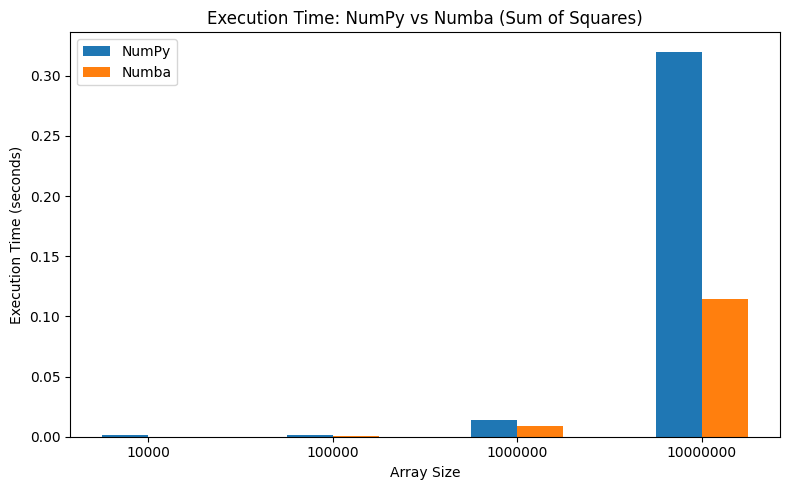

In [ ]:
bar_width = 0.25
x = np.arange(len(sizes))

plt.figure(figsize=(8, 5))
plt.bar(x - bar_width/2, np_time, width=bar_width, label='NumPy')
plt.bar(x + bar_width/2, numba_time, width=bar_width, label='Numba')
plt.xticks(x, sizes)
plt.xlabel("Array Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time: NumPy vs Numba (Sum of Squares)")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

**observations**

For large arrays

Numba becomes faster.

It compiles the loop into machine code, reducing the Python loop overhead completely.